In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
class OptionPayoff:
    def __init__(self) -> None:
        pass

    def long_call_payoff(self, st, k, premium):
        return np.maximum(st - k, 0) - premium

    def short_call_payoff(self, st, k, premium):
        return premium - np.maximum(st - k, 0)

    def long_put_payoff(self, st, k, premium):
        return np.maximum(k - st, 0) - premium

    def short_put_payoff(self, st, k, premium):
        return premium - np.maximum(k - st, 0)

In [3]:
option = OptionPayoff()

rows = 100
columns_long_calls = 2
columns_short_calls = 1

long_calls = np.zeros((rows, columns_long_calls))
short_calls = np.zeros((rows, columns_short_calls))

st = np.linspace(13,25, rows)
#long_calls[:, 0] = st
#short_calls[:, 0] = st

In [4]:
strikes_long_calls = np.array([15, 20])
premiums_long_calls = np.array([4, 0.5])

strikes_short_calls = np.array([17.5])
premiums_short_calls = np.array([2])

long_calls[:, 0:] = option.long_call_payoff(st[:, None], strikes_long_calls, premiums_long_calls)
short_calls[:, 0:] = 2 * option.short_call_payoff(st[:, None], strikes_short_calls, premiums_short_calls)

strat_payoff = np.sum(long_calls[:, 0:], axis=1, keepdims=True) + short_calls[:, 0:]

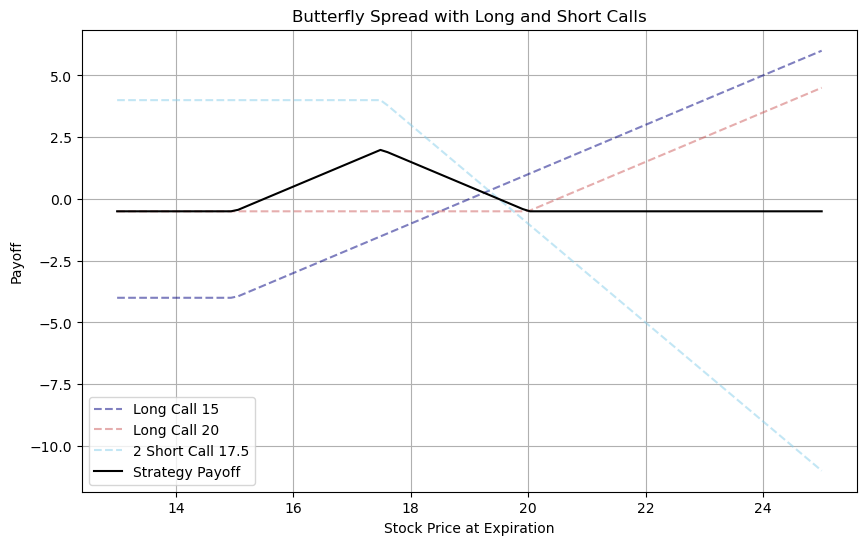

In [5]:
plt.figure(figsize=(10, 6))

plt.plot(st, long_calls[:,0], label='Long Call 15', linestyle='--', c = 'navy', alpha = 0.5)
plt.plot(st, long_calls[:,1], label='Long Call 20', linestyle='--', c = 'indianred', alpha = 0.5)
plt.plot(st, short_calls[:,0], label='2 Short Call 17.5', linestyle='--', c = 'skyblue', alpha = 0.5)
plt.plot(st, strat_payoff, label='Strategy Payoff', c = 'black')

plt.title('Butterfly Spread with Long and Short Calls')
plt.xlabel('Stock Price at Expiration')
plt.ylabel('Payoff')
plt.legend()
plt.grid()
plt.show()